In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import networkx as nx

from biological_fuzzy_logic_networks.utils import read_sif
from biological_fuzzy_logic_networks.draw import draw_BioFuzzNet
from biological_fuzzy_logic_networks.DREAM.DREAMBioFuzzNet import DREAMBioFuzzNet

/dccstor/ipc1/.conda/envs/biofuzznet2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
work_dir = "/dccstor/ipc1/CAR/DREAM/Model/Test/Loops/"

In [3]:
success_runs = []
outputs = []
for i in range(45):
    if "loop_states.csv" in os.listdir(f"{work_dir}{i}"):
        success_runs.append(i)
        states = pd.read_csv(f"{work_dir}{i}/loop_states.csv", index_col=0)
        outputs.append(states)

In [4]:
states

,time,PIP3,AKT_S473,p53,RB,GSK3B,AMPK,cleavedCas,SMAD23,ERK12,...,MKK4,JNK,MAP3Ks,INSR,PAK,STAT5,EGF,MEK12,STAT1,STAT3
0,0,0.383396,0.430812,0.361801,0.781239,0.322408,0.059243,0.868788,0.766962,0.354378,...,0.571408,0.809709,0.871186,0.641973,0.729820,0.119023,1.0,0.265553,0.826255,0.358753
1,0,0.456615,0.997156,0.195245,0.664224,0.282943,0.567754,0.295755,0.618497,0.825923,...,0.815557,0.204898,0.543929,0.233533,0.057109,0.620439,1.0,0.613344,0.861585,0.598132
2,0,0.175815,0.006669,0.369805,0.045576,0.207589,0.843785,0.655620,0.077504,0.756158,...,0.348355,0.797303,0.238340,0.531058,0.104259,0.841665,1.0,0.932960,0.530462,0.406361
3,0,0.955137,0.396174,0.157372,0.339943,0.080441,0.122146,0.557818,0.119375,0.268557,...,0.251028,0.867233,0.683683,0.730173,0.265732,0.928371,1.0,0.493820,0.704368,0.556122
4,0,0.065663,0.437983,0.436461,0.037753,0.239392,0.526438,0.569509,0.688825,0.017019,...,0.547061,0.685393,0.856736,0.382878,0.671560,0.246915,1.0,0.760228,0.115066,0.206046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,71,0.002614,0.000038,0.402324,0.337024,0.544438,0.555282,0.263555,0.432531,0.522182,...,0.591381,0.578112,0.027595,0.987004,0.977903,0.293546,1.0,0.538713,0.372258,0.254457
98,71,0.901426,0.681098,0.399497,0.307394,0.000417,0.555282,0.262290,0.432531,0.615037,...,0.658477,0.566160,0.431551,0.987004,0.992620,0.486195,1.0,0.524853,0.423395,0.318609
99,71,0.824546,0.610344,0.352263,0.316864,0.506542,0.555282,0.241774,0.432531,0.511163,...,0.657684,0.518890,0.427829,0.987004,0.992487,0.254189,1.0,0.655564,0.213980,0.091676
100,71,0.002614,0.000038,0.402324,0.337024,0.544438,0.555282,0.263555,0.432531,0.522182,...,0.591381,0.578112,0.027595,0.987004,0.977903,0.293546,1.0,0.538713,0.372258,0.254457


In [5]:
nodes, edges = read_sif("/dccstor/ipc1/CAR/DREAM/DREAMdata/DREAM_PKN_for_BFZ_input.sif")
model = DREAMBioFuzzNet(nodes, edges)

In [6]:
nx.recursive_simple_cycles(model)

[['ERK12',
  'not2',
  '_and_RAS',
  'RAS',
  'or24',
  'or25',
  'or26',
  'PI3K',
  'or28',
  'SRC',
  'or29',
  'FAK']]

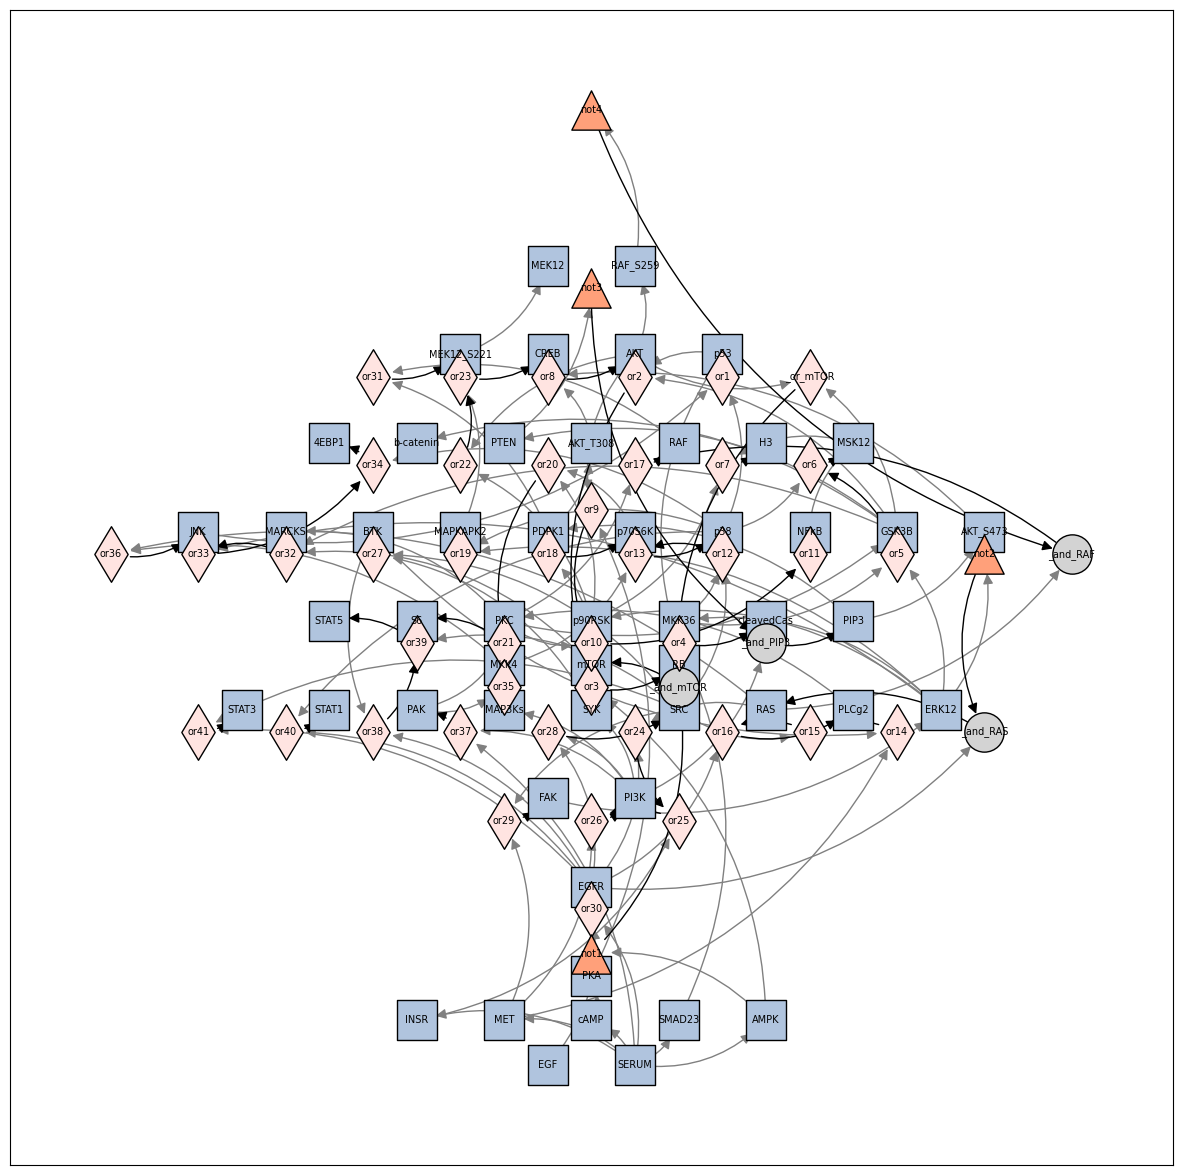

In [7]:
p = draw_BioFuzzNet(model)

In [8]:
loop_nodes = ["ERK12", "RAS", "PI3K", "SRC", "FAK"]

In [10]:
states[["time"]+loop_nodes]

,time,ERK12,RAS,PI3K,SRC,FAK
0,0,0.354378,8.645801e-01,0.606517,0.978943,0.791024
1,0,0.825923,8.668120e-01,0.807045,0.350841,0.304164
2,0,0.756158,8.134425e-01,0.613991,0.949932,0.331124
3,0,0.268557,3.900489e-01,0.907698,0.602097,0.786976
4,0,0.017019,8.855306e-01,0.414313,0.350153,0.661634
...,...,...,...,...,...,...
97,71,0.522182,4.422067e-01,0.093738,0.223155,0.532695
98,71,0.615037,2.675518e-01,0.929238,0.373547,0.623455
99,71,0.511163,1.492202e-13,0.922388,0.205667,0.521980
100,71,0.522182,4.422067e-01,0.093738,0.223155,0.532695


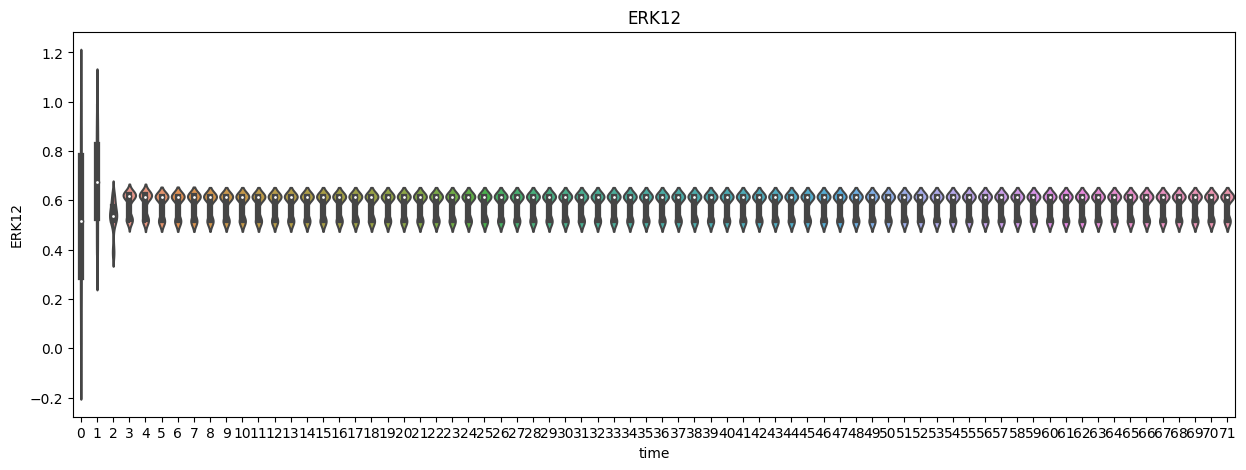

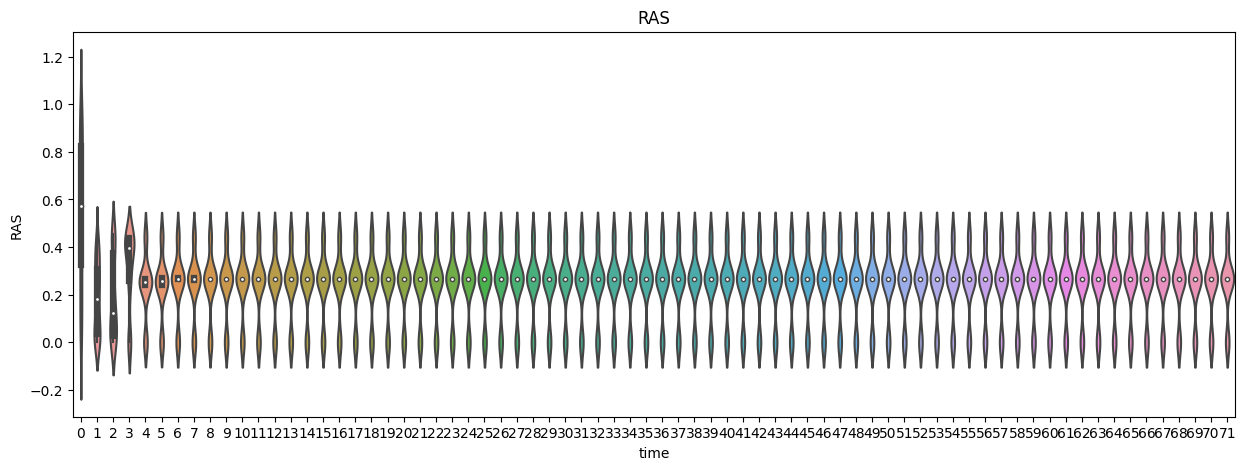

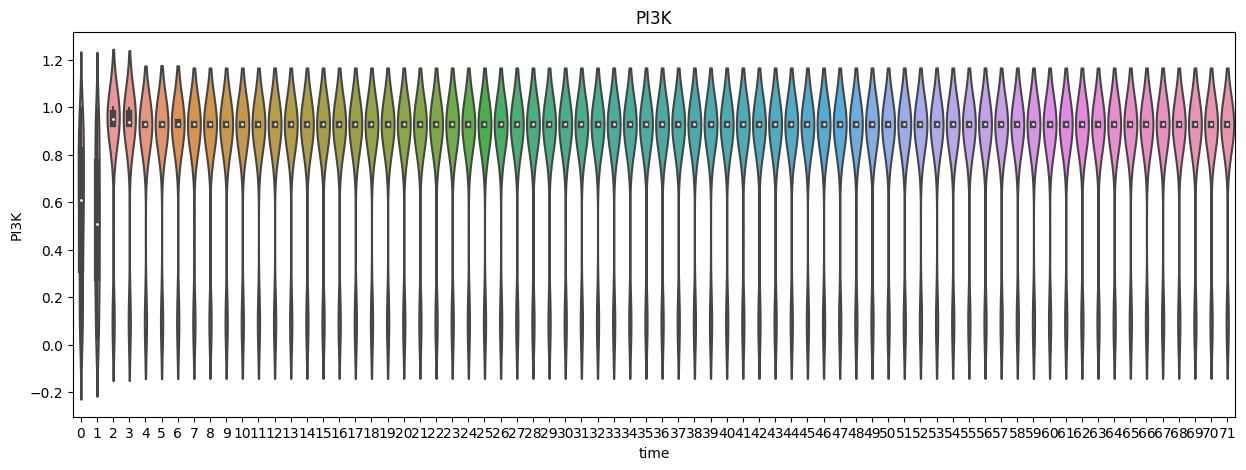

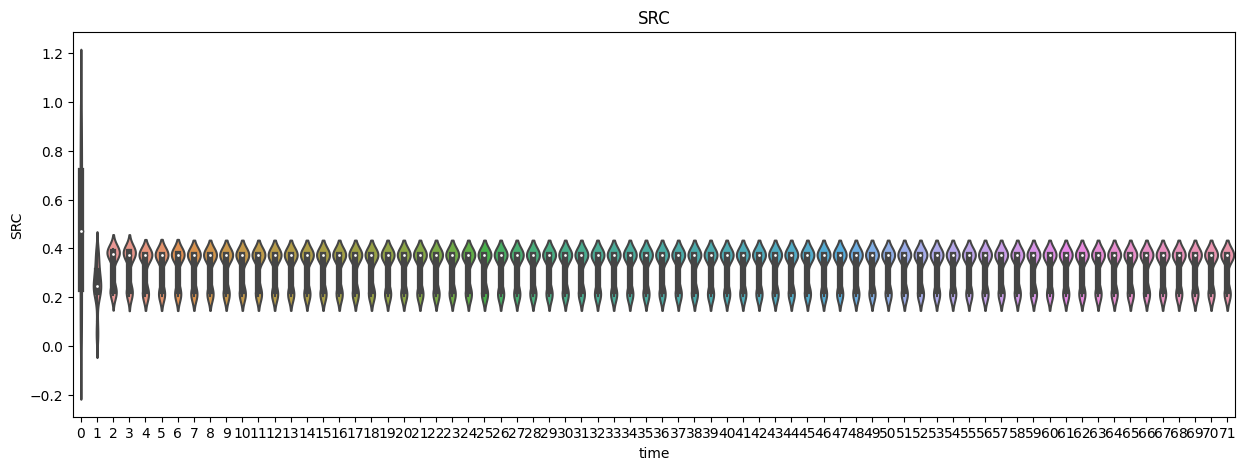

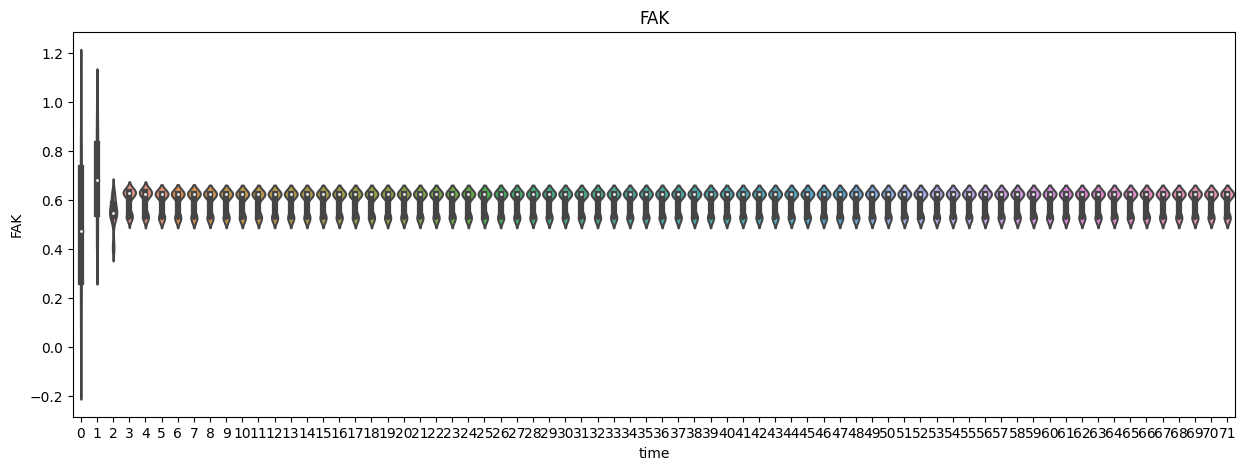

In [15]:
for node in loop_nodes:
    plt.figure(figsize=(15,5))
    sns.violinplot(states[["time"]+loop_nodes], x="time", y=node)
    plt.title(node)
    plt.show()

In [18]:
all_loop_states = pd.concat(outputs, 
          keys=success_runs, 
          names=["param_setting", ""]).reset_index("param_setting", drop=False).reset_index(drop=True)

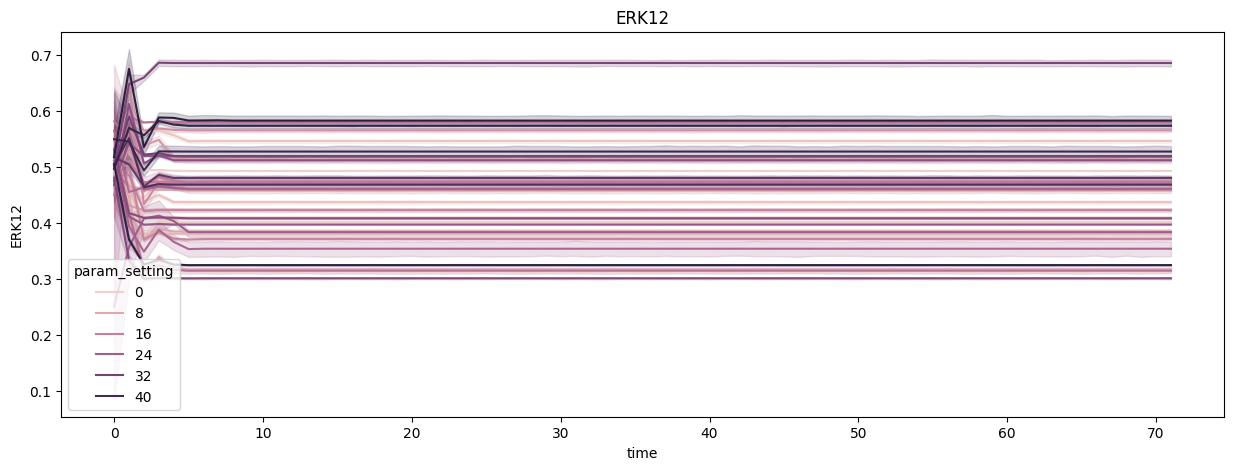

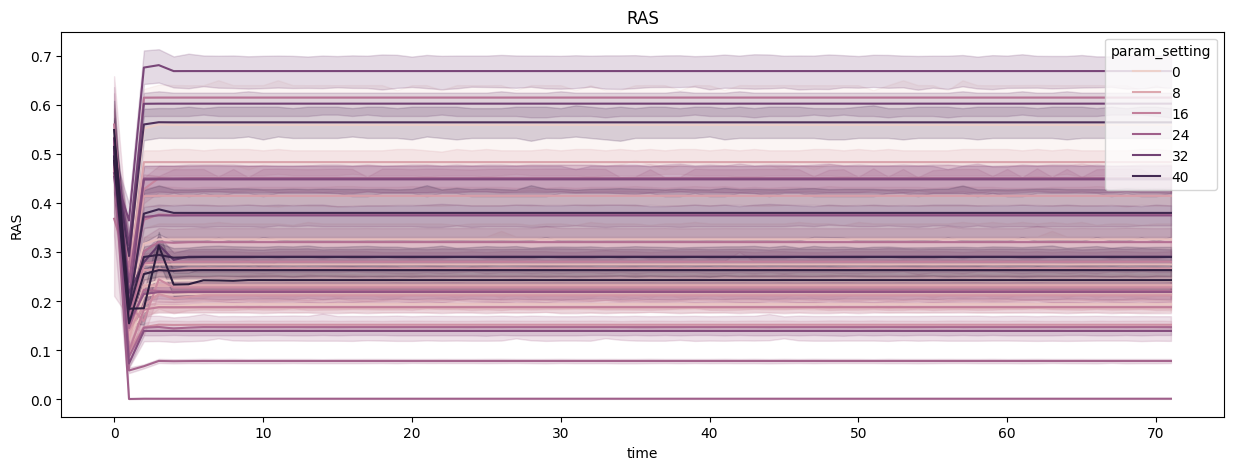

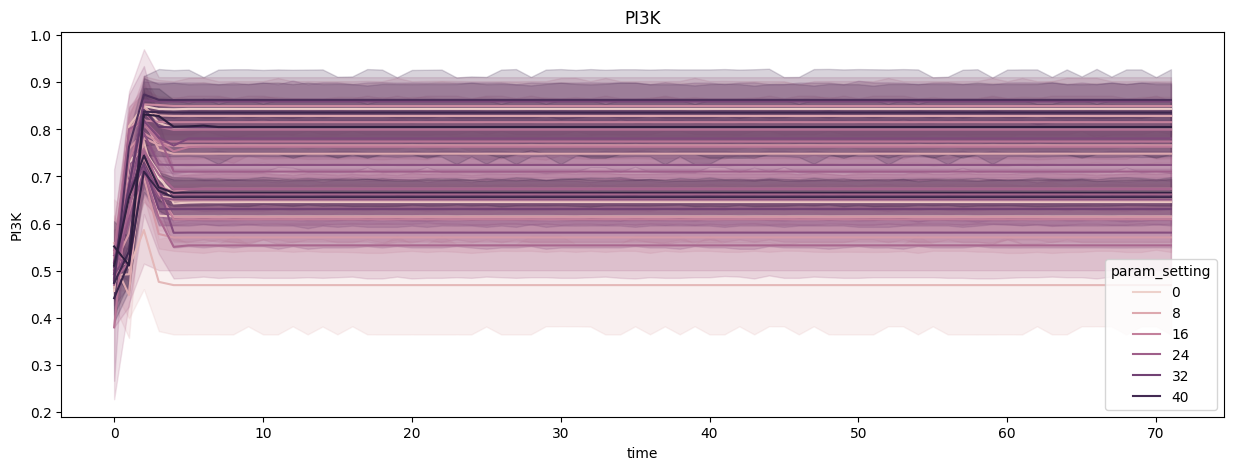

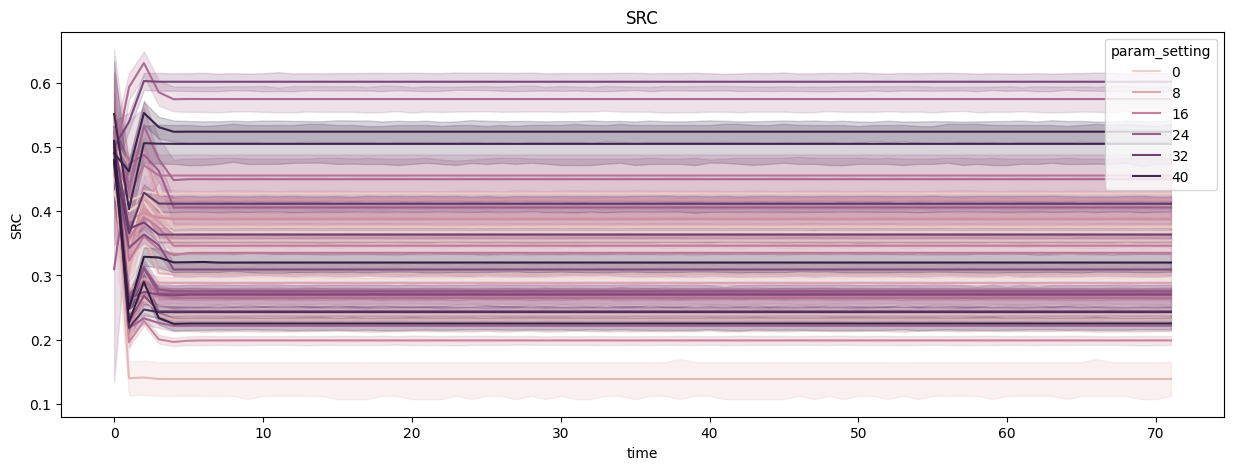

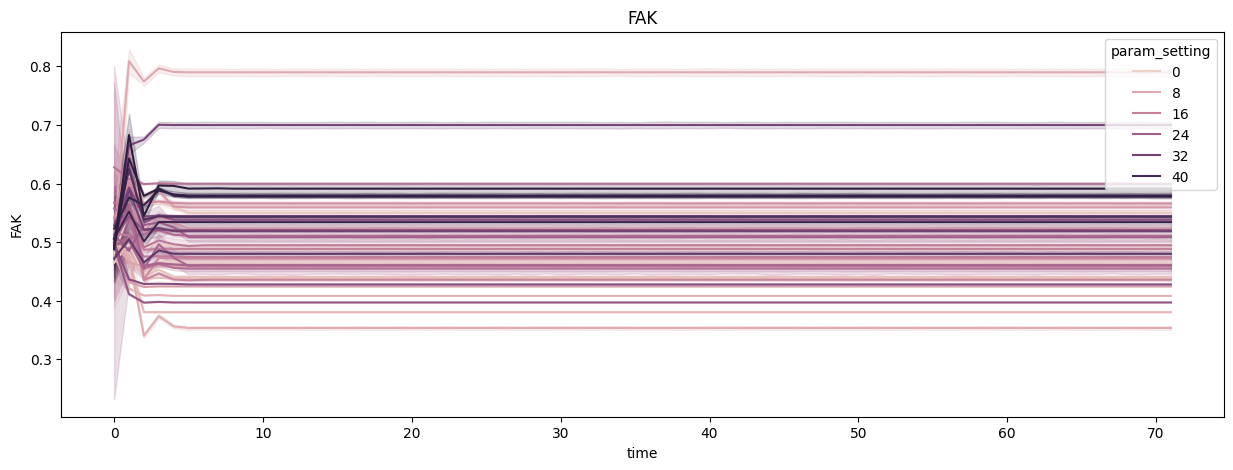

In [20]:
for node in loop_nodes:
    plt.figure(figsize=(15,5))
    sns.lineplot(all_loop_states, x="time", y=node, hue="param_setting")
    plt.title(node)
    plt.show()


In [21]:
model.edges

OutEdgeView([('PIP3', 'AKT_S473'), ('PIP3', 'PDPK1'), ('AKT_S473', 'or8'), ('p53', 'or2'), ('p53', 'or4'), ('GSK3B', 'PTEN'), ('GSK3B', '_or_mTOR'), ('GSK3B', 'b-catenin'), ('GSK3B', 'or2'), ('GSK3B', 'or32'), ('AMPK', 'not1'), ('AMPK', 'or3'), ('SMAD23', 'or4'), ('ERK12', 'MKK36'), ('ERK12', 'p90RSK'), ('ERK12', 'not2'), ('ERK12', 'or5'), ('ERK12', 'or19'), ('ERK12', 'or33'), ('MSK12', 'or7'), ('MSK12', 'or11'), ('MKK36', 'or5'), ('MKK36', 'or12'), ('p90RSK', 'or7'), ('p90RSK', 'or20'), ('p90RSK', 'or22'), ('SERUM', 'SMAD23'), ('SERUM', 'AMPK'), ('SERUM', 'cAMP'), ('SERUM', 'MET'), ('SERUM', 'INSR'), ('SERUM', 'or30'), ('SERUM', 'or37'), ('_and_mTOR', 'mTOR'), ('AKT', '_or_mTOR'), ('AKT', 'RAF_S259'), ('AKT', 'or9'), ('AKT', 'or22'), ('cAMP', 'PKA'), ('PKA', 'or9'), ('PKC', 'GSK3B'), ('PKC', 'MARCKS'), ('PKC', 'or10'), ('PKC', 'or17'), ('p38', 'or1'), ('p38', 'or6'), ('p38', 'or19'), ('p38', 'or34'), ('p38', 'or40'), ('PLCg2', 'PKC'), ('MET', 'or14'), ('MET', 'or26'), ('MET', 'or29'),